In [ ]:
import math
import torch
import hess
import hess.utils as utils
import hess.nets
from hess.nets import BasicConv as Net
import numpy as np
import pickle

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

from compute_loss_surface import get_loss_surface
import matplotlib.pyplot as plt

In [20]:

fpath = "./outputs/"
use_cuda =  torch.cuda.is_available()

model = Net()
criterion = torch.nn.CrossEntropyLoss()

if use_cuda:
    torch.cuda.set_device(4)
    saved_pars = torch.load(fpath+"saved_model.pt")
    model.load_state_dict(saved_pars)
    model = model.cuda()

In [21]:
transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/datasets/cifar10/', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

Files already downloaded and verified


In [35]:
evecs = evecs.to(torch.randn(5).cuda().device);
evals = evals.to(torch.randn(5).cuda().device);

In [56]:
high_loss = get_loss_surface(evecs[:, -2:], model, trainloader,
                            criterion, rng=5., n_pts=5, use_cuda=True)

In [57]:
def gram_schmidt(vector, basis):
    n_base = basis.shape[-1]
    for bb in range(n_base):
        vector = vector - vector.dot(basis[:, bb]).div(basis[:, bb].norm()) * basis[:, bb]
        vector = vector.div(vector.norm())

    return vector

In [58]:
v1 = gram_schmidt(torch.randn(evecs.shape[0]).cuda(), evecs).unsqueeze(-1)
v2 = gram_schmidt(torch.randn(evecs.shape[0]).cuda(), evecs).unsqueeze(-1)

In [59]:
low_basis = torch.cat((v1, v2), -1)

In [60]:
low_loss = get_loss_surface(low_basis, model, trainloader,
                            criterion, rng=5., n_pts=5, use_cuda=True)

In [71]:
full_basis = torch.randn_like(low_basis).cuda()
full_loss = get_loss_surface(full_basis, model, trainloader,
                            criterion, rng=5., n_pts=5, use_cuda=True)

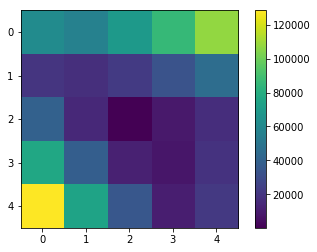

In [72]:
plt.imshow(high_loss.cpu())
plt.colorbar()

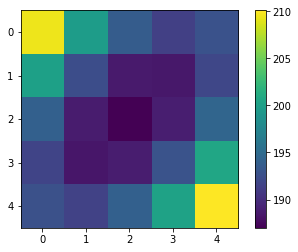

In [73]:
plt.imshow(low_loss.cpu())
plt.colorbar()

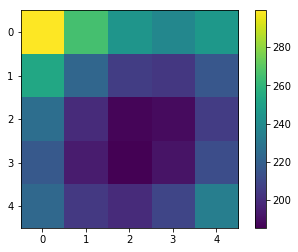

In [74]:
plt.imshow(full_loss.cpu())
plt.colorbar()

In [68]:
rng = 5.
n_pts = 25
fname = "high_loss_" + str(rng) + "_" + str(n_pts)
fname = fname.replace(".", "_")

In [69]:
fname

'high_loss_5_0_25'